(89351, 151)


Text(0.5, 1.0, 'Singular Value Spectrum')

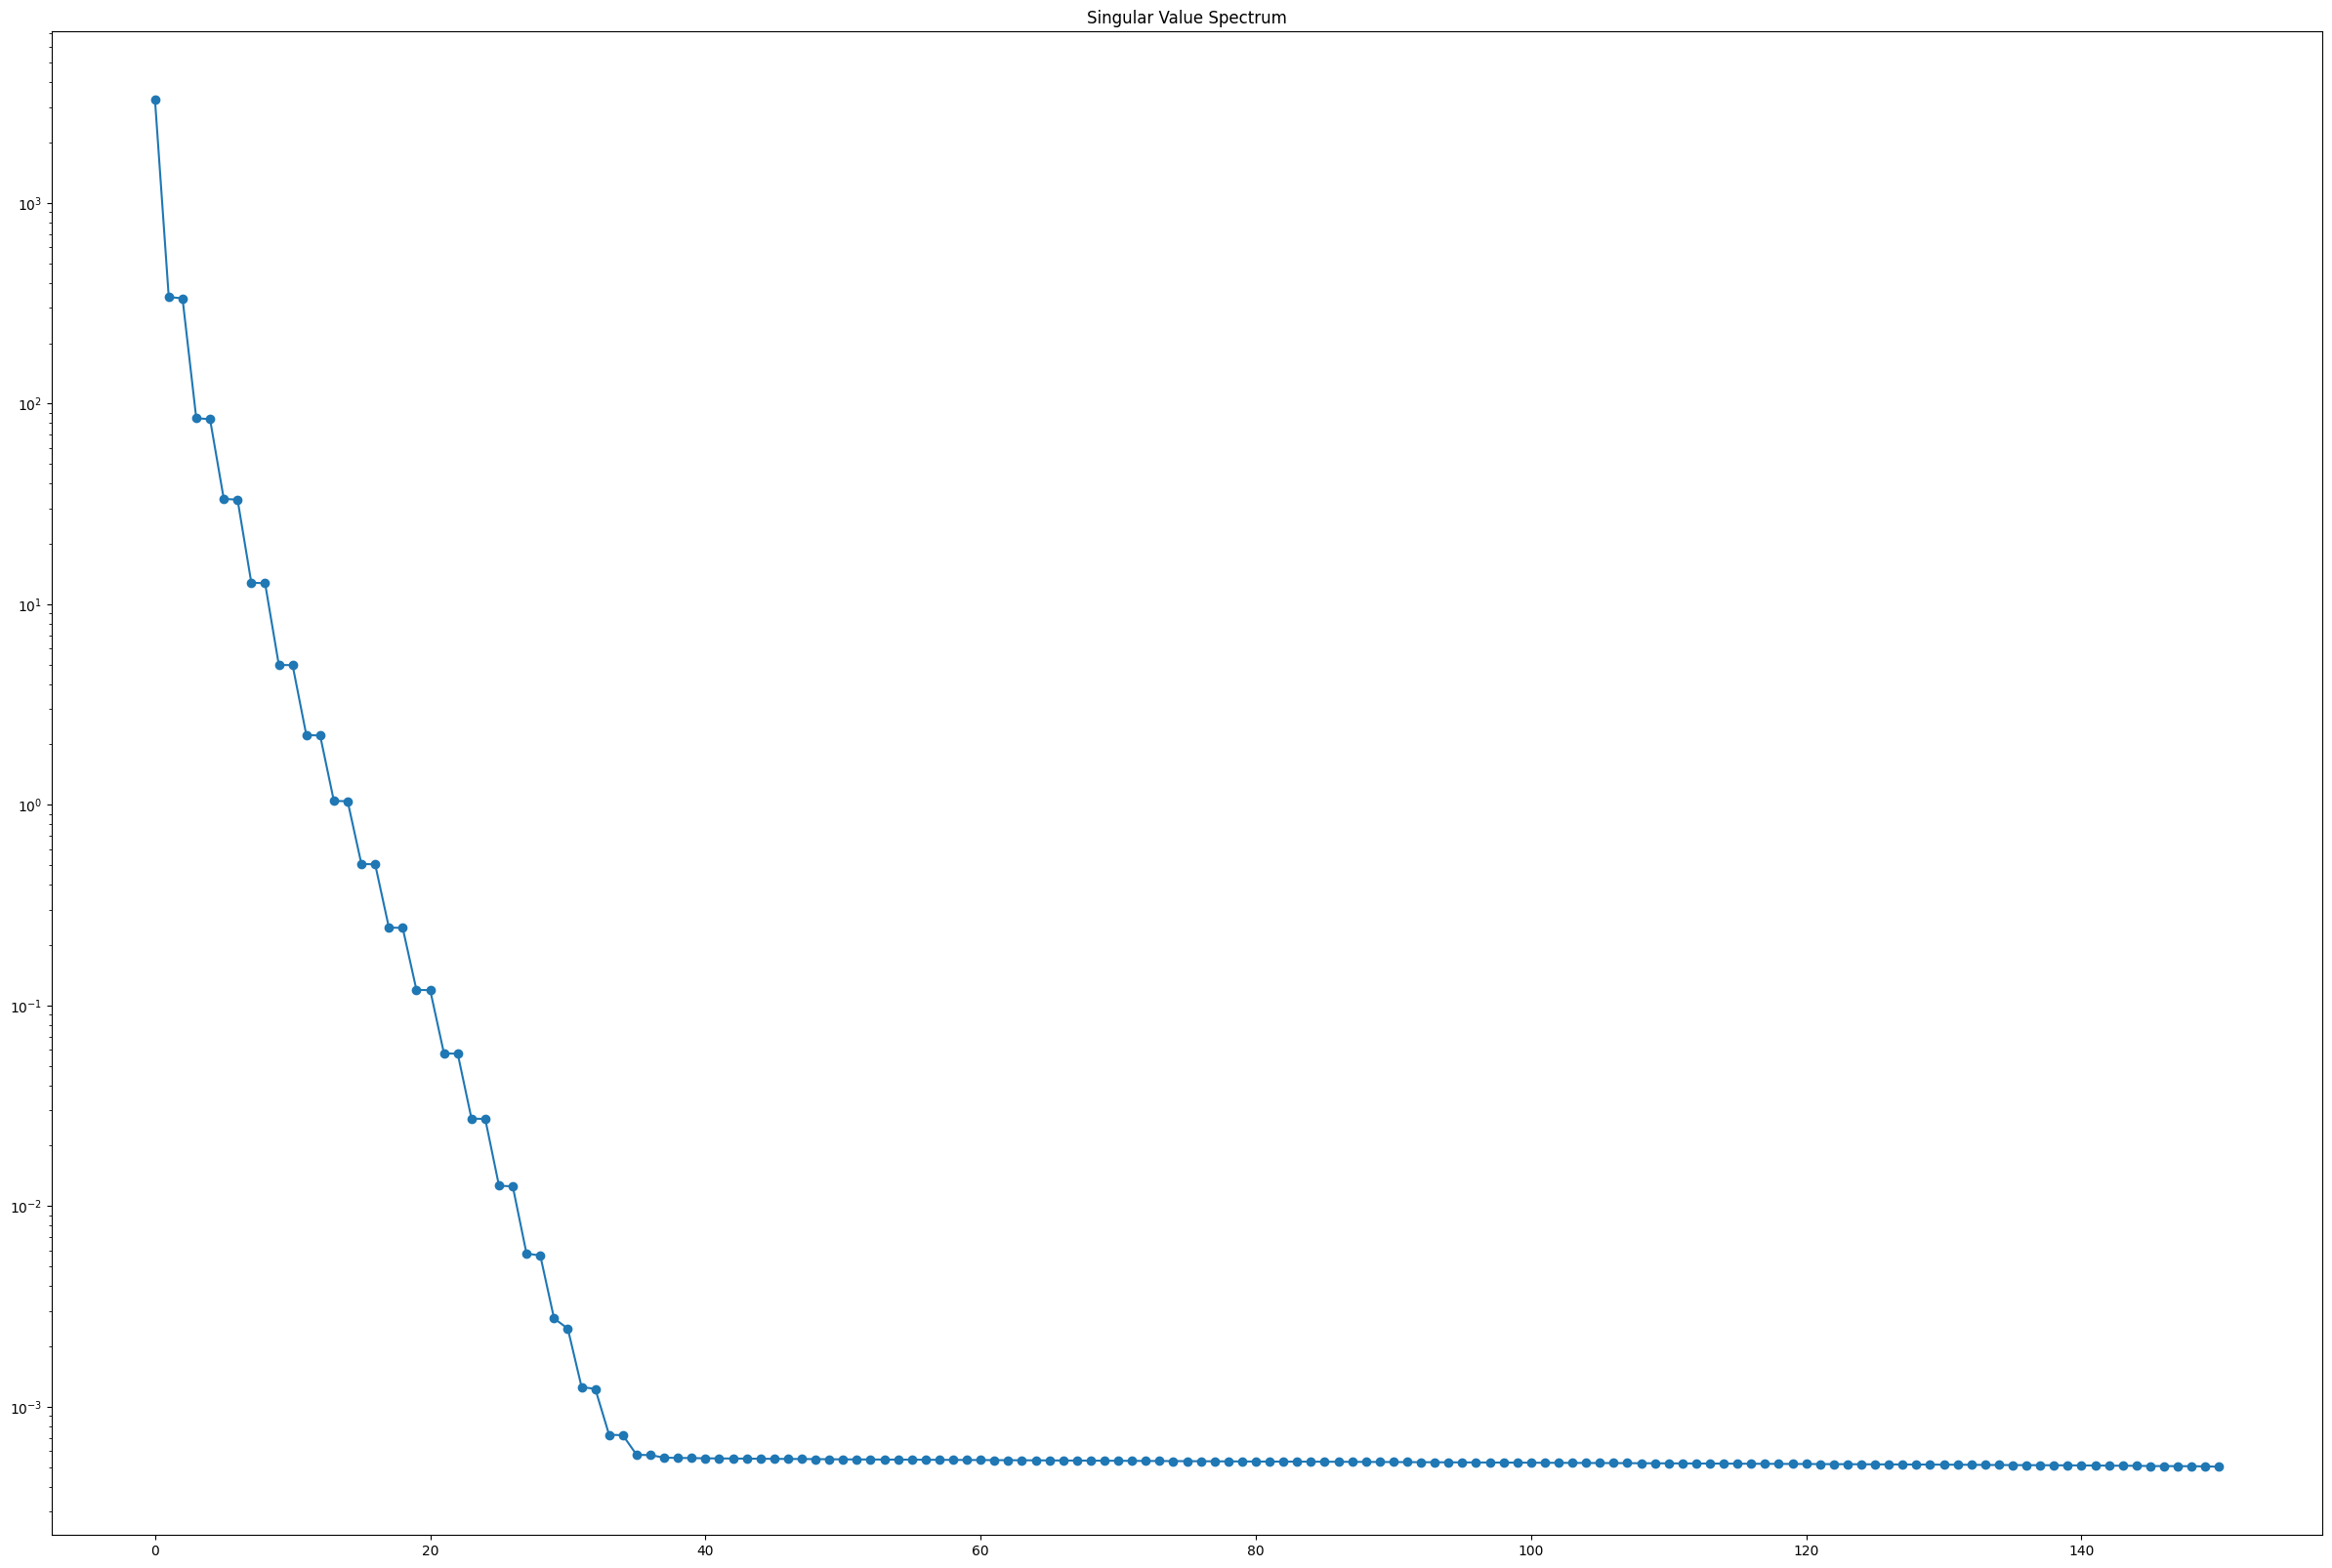

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
x = scipy.io.loadmat('/Users/bhaskarspc/DATA/FLUIDS/CYLINDER_ALL.mat')
data = x['UALL']
print(data.shape)
shape_of_data = (449, 199)

# Perform SVD
U, S, VT = np.linalg.svd(data, full_matrices=False)


# Plot the singular value spectrum
plt.rcParams['figure.figsize'] = [30,20]
plt.semilogy(S, marker='o')
plt.title("Singular Value Spectrum")



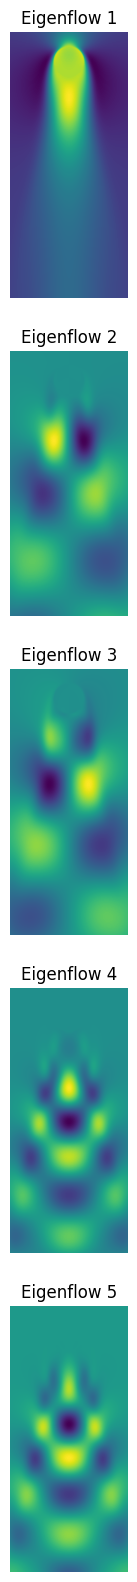

In [40]:
# Plot the leading singular vectors (eigenflow fields)
num_eigenflows_to_plot = 5  # Adjust as needed
for i in range(num_eigenflows_to_plot):
    eigenflow = U[:, i].reshape(449, 199)
    plt.subplot(num_eigenflows_to_plot, 1, i + 1)
    plt.imshow(eigenflow, cmap='viridis')
    plt.title(f"Eigenflow {i + 1}")
    plt.axis('off')

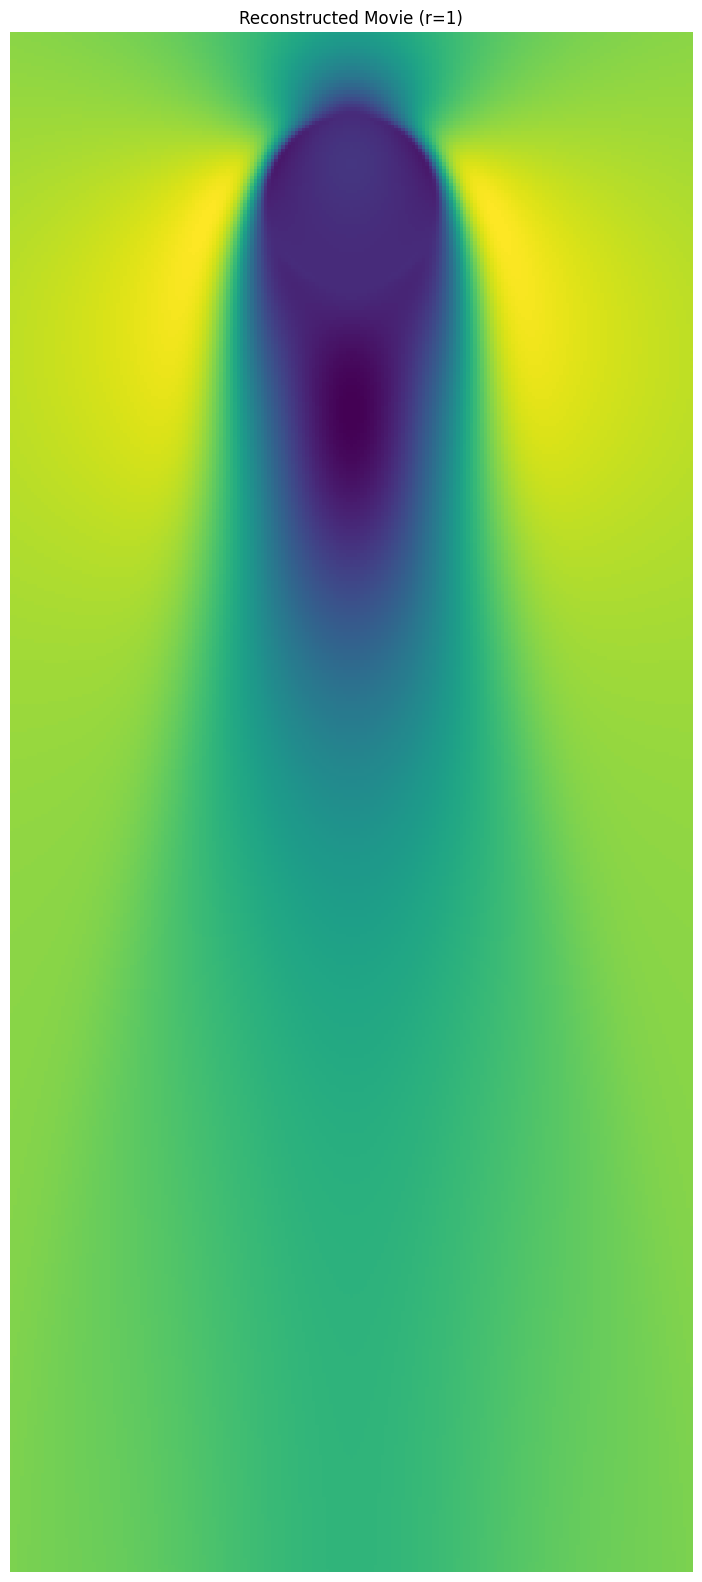

Frobenius Norm Squared Error (r=1): 244169.1126807571


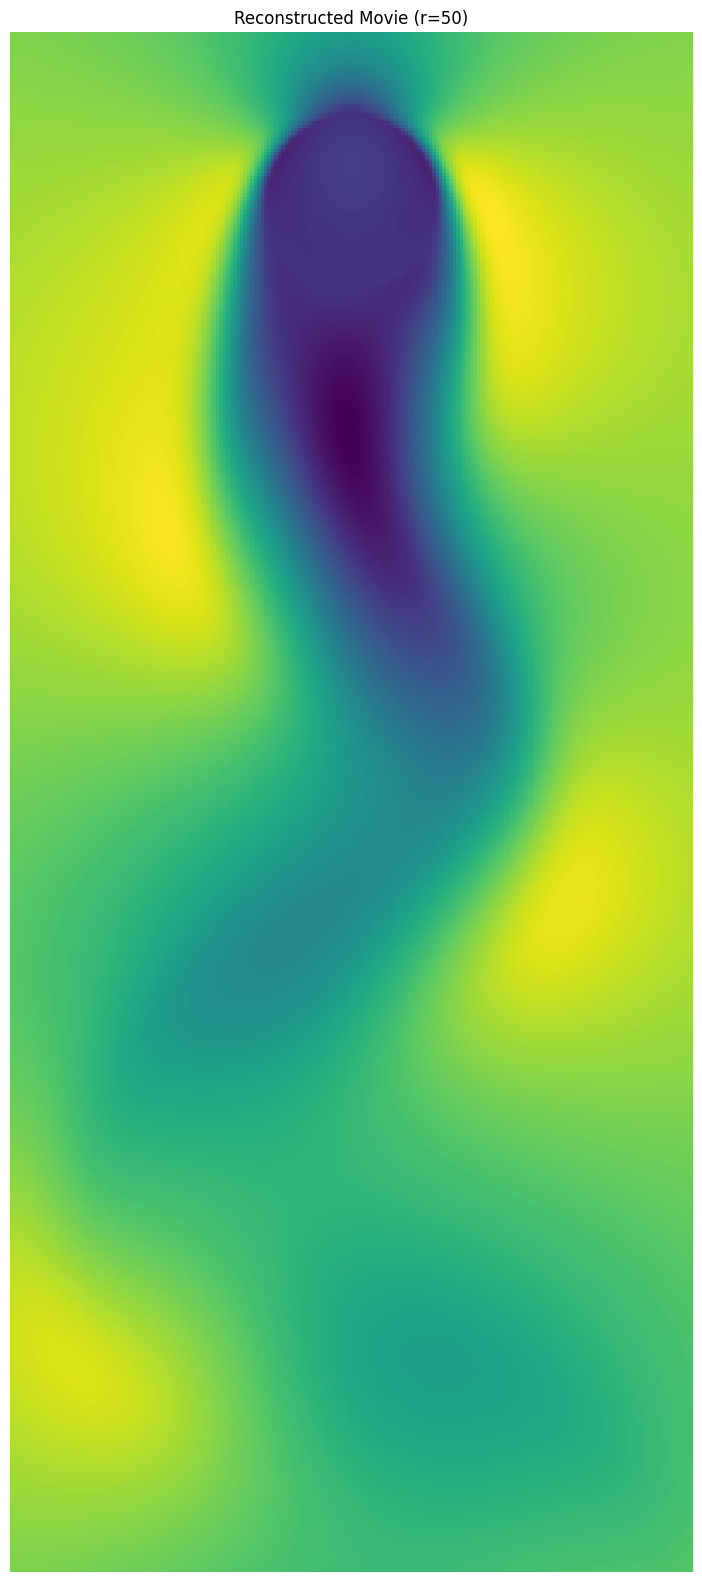

Frobenius Norm Squared Error (r=50): 2.7915025485076648e-05


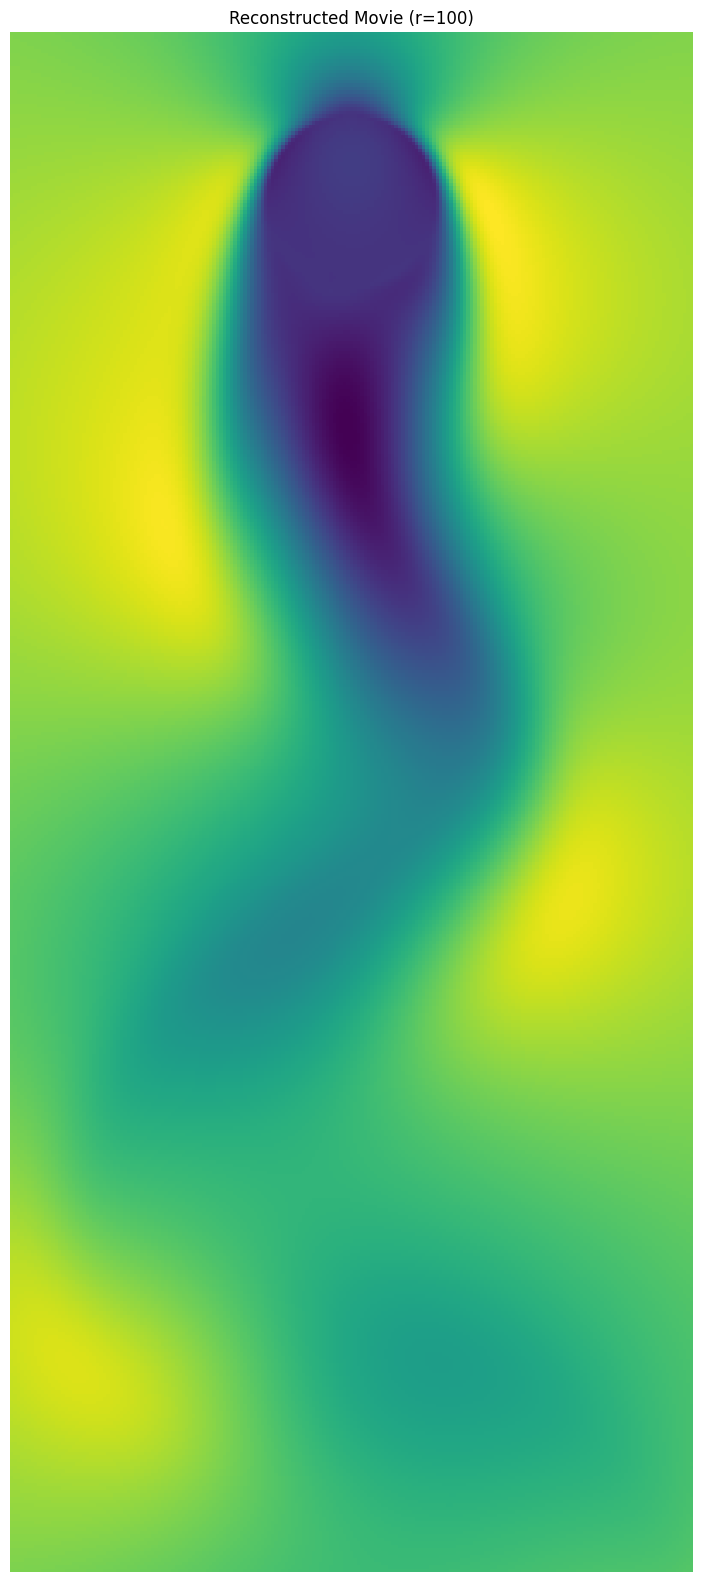

Frobenius Norm Squared Error (r=100): 1.3565358656174077e-05


r to capture 90.0% of energy: 1
r to capture 99.0% of energy: 3
r to capture 99.9% of energy: 4


In [41]:
# Truncate to different r values (e.g., r = 10, 50, 100)
r_values = [1, 50, 100]

for r in r_values:
    # Truncate U, S, and VT to r dimensions
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]

    # Reconstruct X
    X_reconstructed = np.dot(Ur, np.dot(Sr, VTr))
    # print(X_reconstructed[:, 0].shape)
    X = X_reconstructed[:, 0]
    # Plot the reconstructed movie
    # You'll need to adapt this code to your specific visualization requirements
    plt.figure()
    plt.imshow(X.reshape(shape_of_data), cmap='viridis')
    plt.title(f"Reconstructed Movie (r={r})")
    plt.axis('off')
    plt.show()
    
    # Compute Frobenius norm squared error
    frobenius_norm_squared_error = np.linalg.norm(data - X_reconstructed, 'fro')**2
    print(f"Frobenius Norm Squared Error (r={r}): {frobenius_norm_squared_error}")

# Determine the r values needed to capture energy percentages
total_energy = np.sum(S**2)
energy_percentages = [0.90, 0.99, 0.999]

print('\n')

for percentage in energy_percentages:
    cumulative_energy = np.cumsum(S**2) / total_energy
    r_needed = np.argmax(cumulative_energy >= percentage) + 1
    print(f"r to capture {percentage * 100}% of energy: {r_needed}")


In [49]:
# Step (c): Fix r = 10 and compare snapshots
r_fixed = 10
U_fixed = U[:, :r_fixed]
S_fixed = S[:r_fixed]
Vt_fixed = VT[:r_fixed, :]

k = 5  # Adjust as needed
snapshot_k = data[:, k].reshape(449, 199)  # Choose a snapshot

print(snapshot_k.shape)

(449, 199)
